In [12]:
# import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
%matplotlib inline
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
import pandas as pd

Reading the data from a csv file

In [13]:
data=pd.read_csv('train.csv')
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


Exploring the shape of the data

In [14]:
data.shape

(10886, 12)

Drop the "atemp" attribute since it has no significance

In [15]:
data.drop('atemp',axis=1,inplace=True) #since it's redundant

Exploring the number of records found for each season

In [16]:
data['season'].value_counts()

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

Getting useful information from the datetime attribute. 
Extracting the mongth, year, day, hour, dayOfWeek and making an attribute for each and then dropping the datetime attribute.

In [17]:
data.datetime = pd.to_datetime(data.datetime)
data['month'] = data.datetime.dt.month
data['year']= data.datetime.dt.year
data['day']=data.datetime.dt.day
data['hour']=data.datetime.dt.hour
data['dayOfWeek']=data.datetime.dt.dayofweek
data.drop('datetime',axis=1,inplace=True)

In [18]:
print("\'workingday\' value_counts:\n",data['workingday'].value_counts(),"\n\n")
print("\'season'\ value_counts:\n",data['season'].value_counts())
print("\'holiday'\ value_counts:\n",data['holiday'].value_counts())

'workingday' value_counts:
 1    7412
0    3474
Name: workingday, dtype: int64 


'season'\ value_counts:
 4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64
'holiday'\ value_counts:
 0    10575
1      311
Name: holiday, dtype: int64


View the final form of the dataframe

In [19]:
data.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,month,year,day,hour,dayOfWeek
0,1,0,0,1,9.84,81,0.0,3,13,16,1,2011,1,0,5
1,1,0,0,1,9.02,80,0.0,8,32,40,1,2011,1,1,5
2,1,0,0,1,9.02,80,0.0,5,27,32,1,2011,1,2,5
3,1,0,0,1,9.84,75,0.0,3,10,13,1,2011,1,3,5
4,1,0,0,1,9.84,75,0.0,0,1,1,1,2011,1,4,5


Rearrange the attributes

In [20]:
#rearrange columns
data=data[['year','month','dayOfWeek','hour','season','holiday','workingday','weather','temp','humidity','windspeed','casual','registered','count']]
data.head()

,year,month,dayOfWeek,hour,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count
0,2011,1,5,0,1,0,0,1,9.84,81,0.0,3,13,16
1,2011,1,5,1,1,0,0,1,9.02,80,0.0,8,32,40
2,2011,1,5,2,1,0,0,1,9.02,80,0.0,5,27,32
3,2011,1,5,3,1,0,0,1,9.84,75,0.0,3,10,13
4,2011,1,5,4,1,0,0,1,9.84,75,0.0,0,1,1


Dropping "casual" and "registered" , since always casual + registered = count

In [21]:
data.drop('casual',axis=1,inplace=True)
data.drop('registered',axis=1,inplace=True)

Dropping any value = 0 for the windspeed. Since it's almost an error in the collection of the data

In [22]:
data.drop(data[data.windspeed==0.0].index,inplace = True)

In [24]:
data.head()

,year,month,dayOfWeek,hour,season,holiday,workingday,weather,temp,humidity,windspeed,count
5,2011,1,5,5,1,0,0,2,9.84,75,6.0032,1
10,2011,1,5,10,1,0,0,1,15.58,76,16.9979,36
11,2011,1,5,11,1,0,0,1,14.76,81,19.0012,56
12,2011,1,5,12,1,0,0,1,17.22,77,19.0012,84
13,2011,1,5,13,1,0,0,2,18.86,72,19.9995,94


## Visualizations

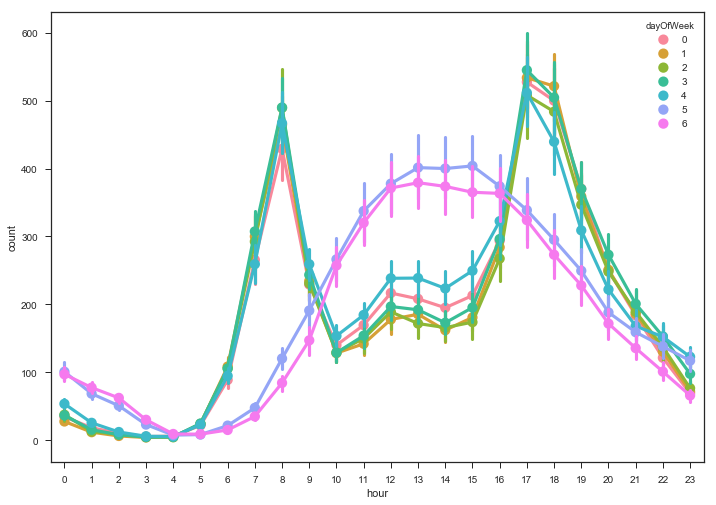

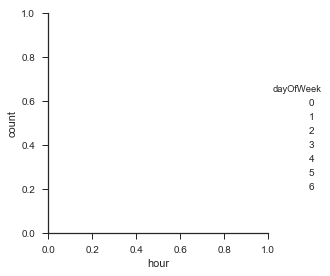

In [25]:
sns.set(style="ticks",color_codes=True)
a4_dims=(11.7,8.27)
fig,ax = pyplot.subplots(figsize=a4_dims)
sns.factorplot(x='hour',y='count',data=data,hue='dayOfWeek',ax=ax)
plt.show()

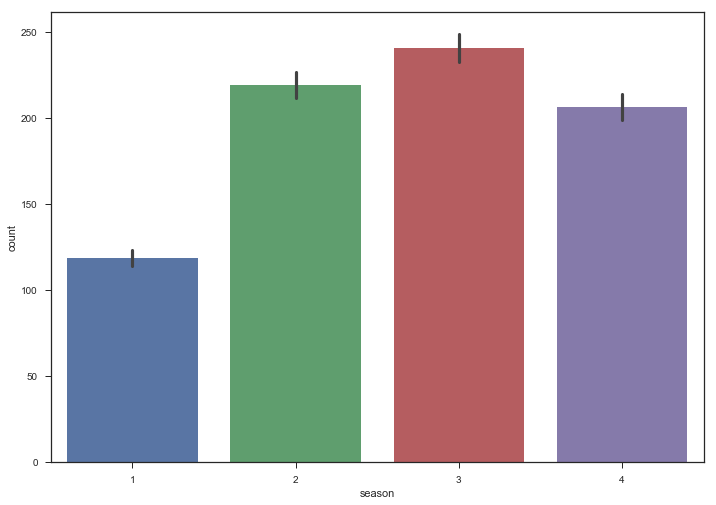

In [26]:
a4_dims=(11.7,8.27)
fig,ax = pyplot.subplots(figsize=a4_dims)
sns.barplot(x='season',y='count',data=data,ax=ax)


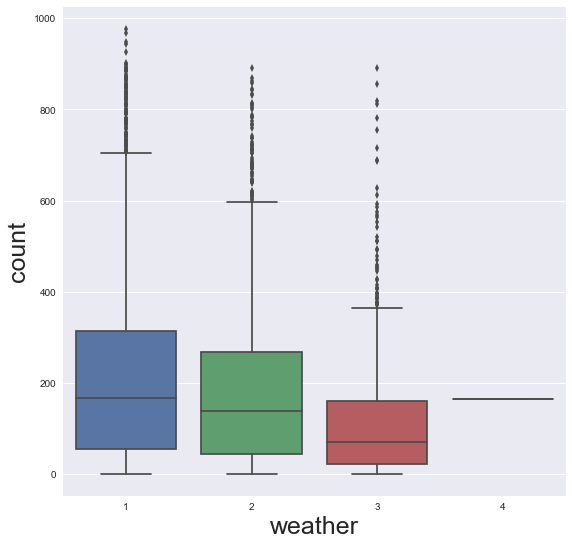

In [27]:
rc={'axes.labelsize':25,'font.size':25,'legend.fontsize':25.0,'axes.titlesize':25}
sns.set(rc=rc)
a4_dims=(9,9)
fig,ax = pyplot.subplots(figsize=a4_dims)
sns.boxplot(x='weather',y='count',data=data,ax=ax)

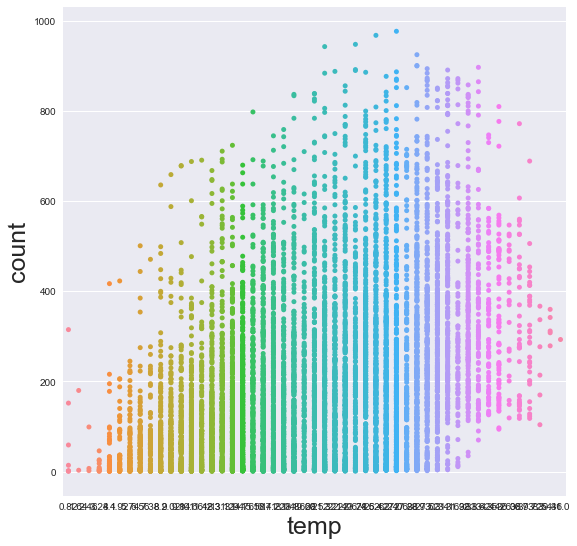

In [28]:
rc={'axes.labelsize':25,'font.size':25,'legend.fontsize':25.0,'axes.titlesize':25}
sns.set(rc=rc)
a4_dims=(9,9)
fig,ax = pyplot.subplots(figsize=a4_dims)
sns.stripplot(x='temp',y='count',data=data,ax=ax)

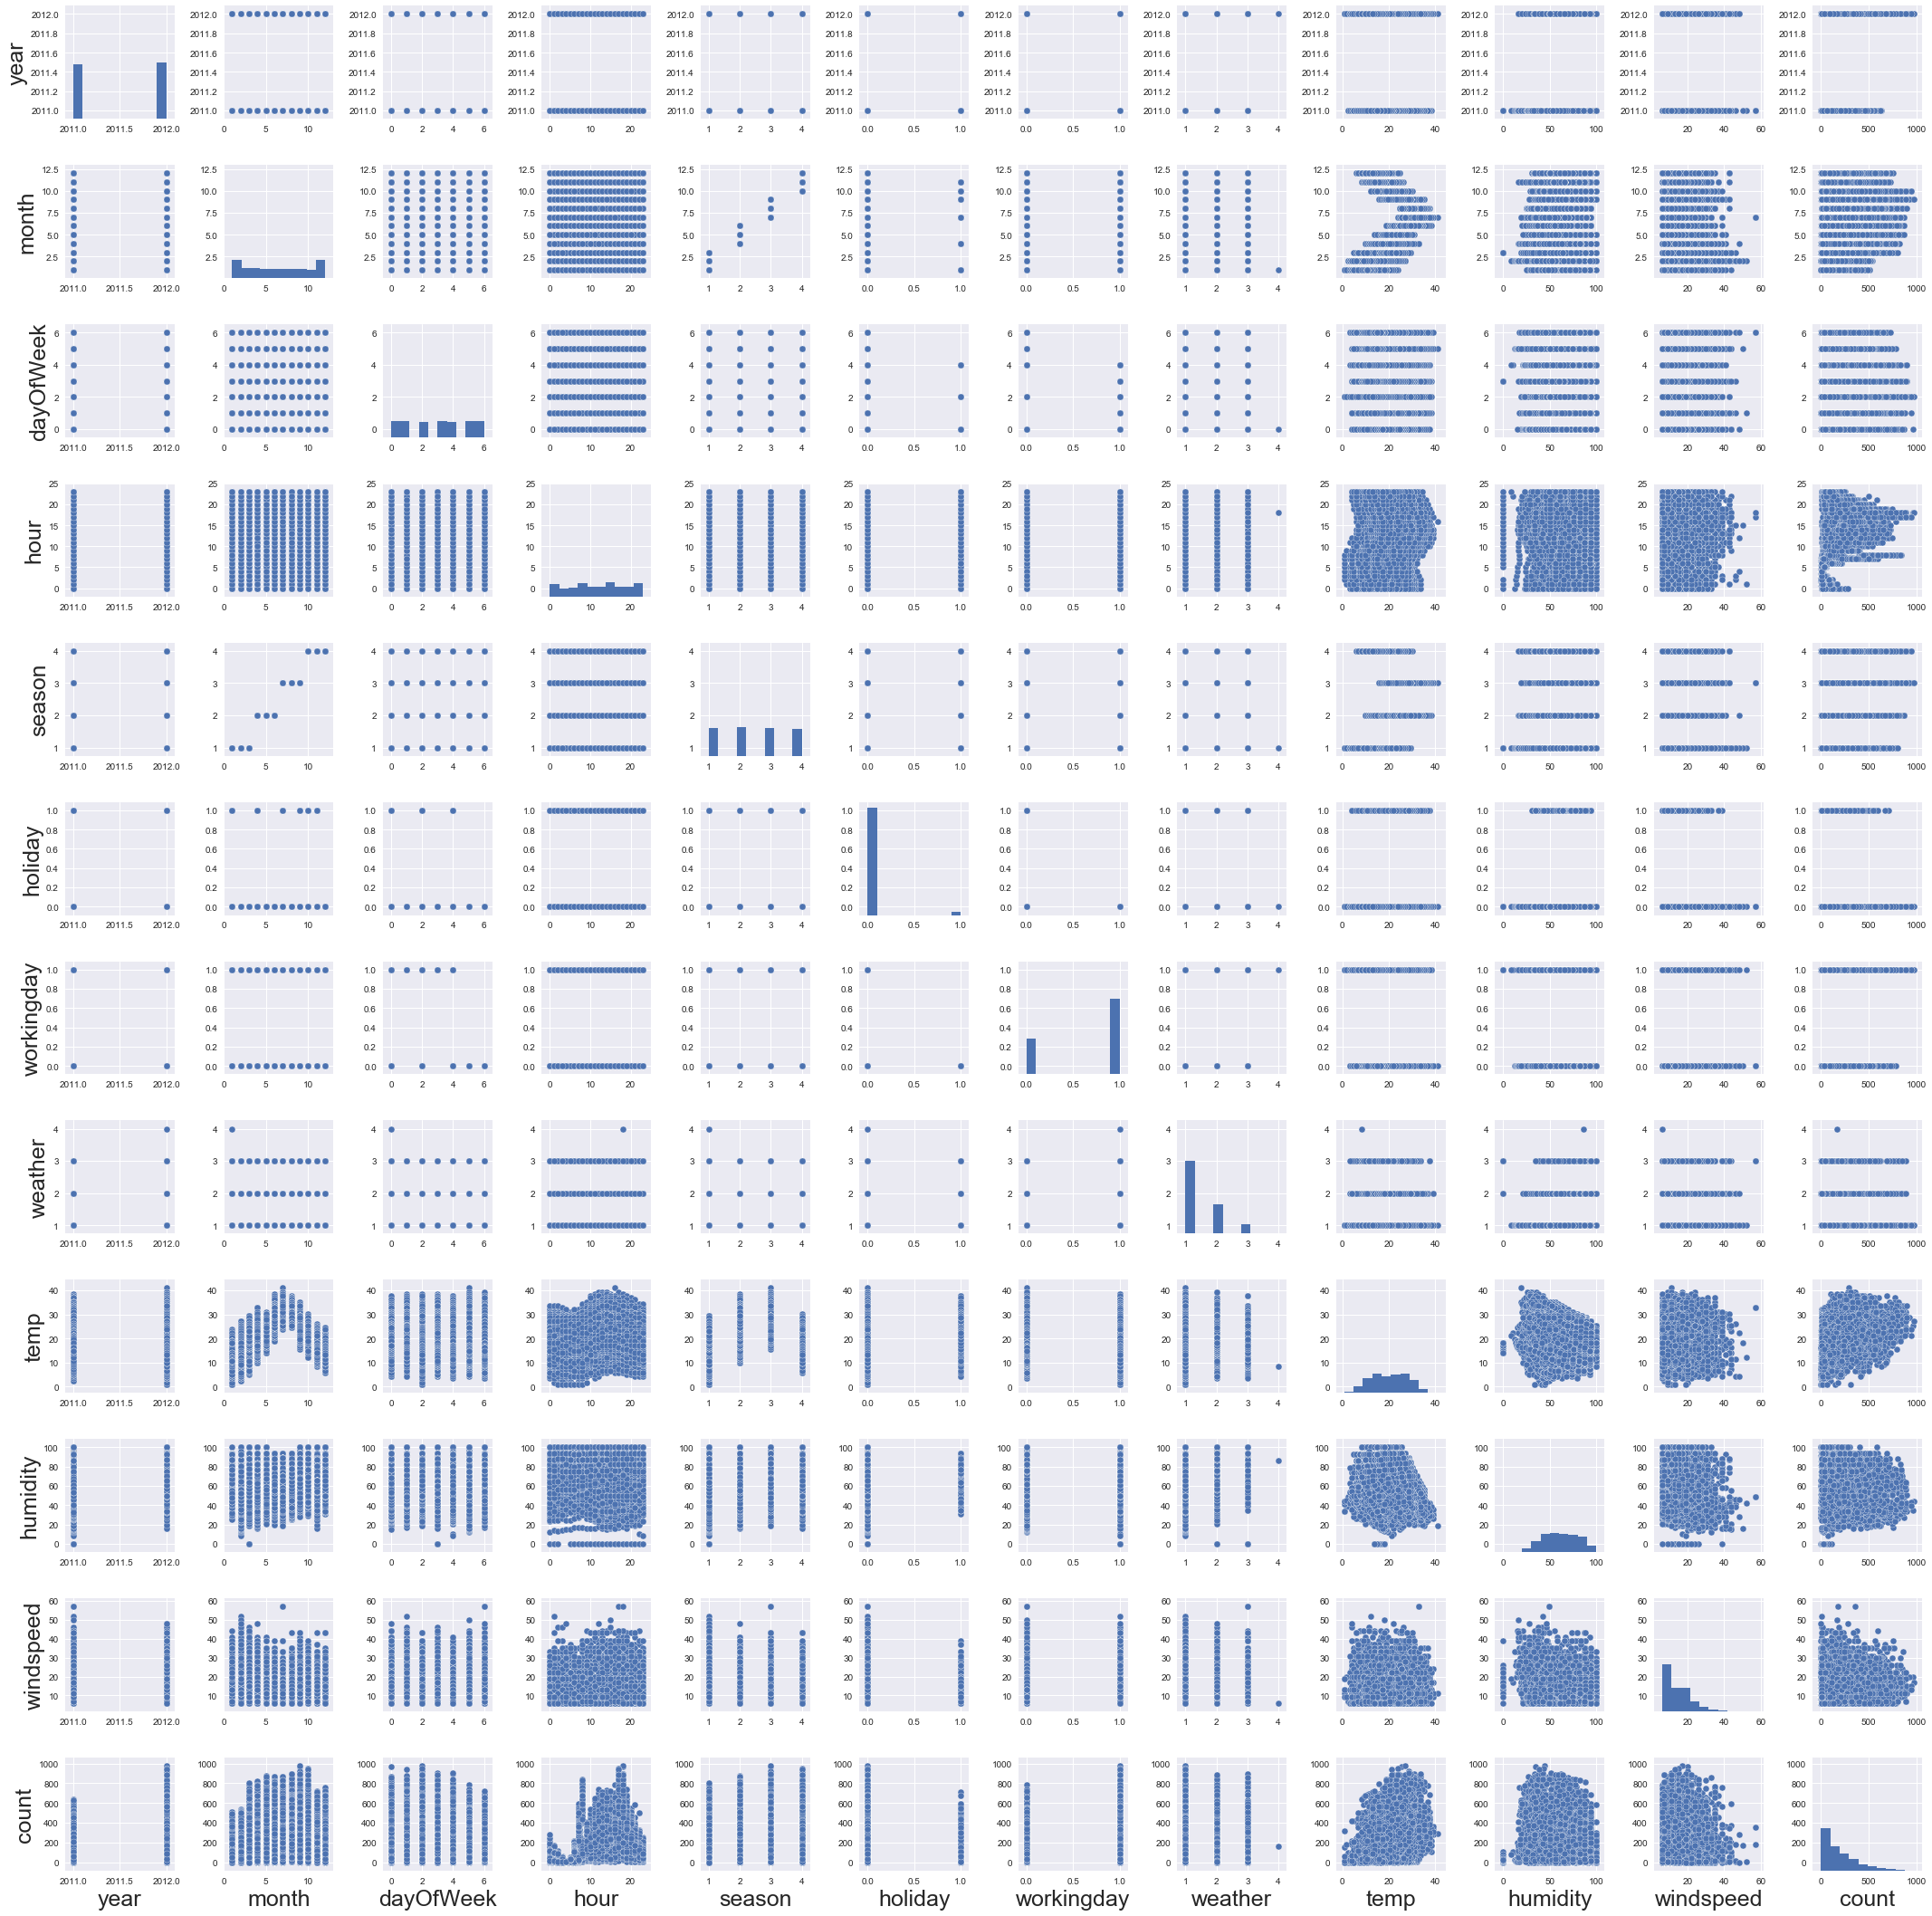

In [29]:
plt.rcParams['figure.figsize']=(20,20) 
sns.pairplot(data)

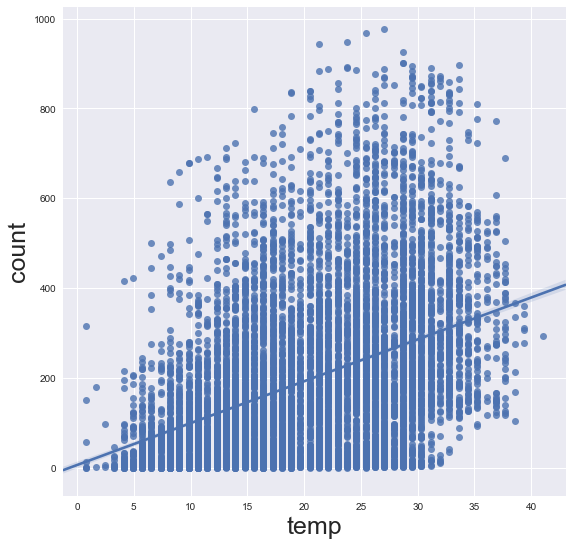

In [30]:
rc={'axes.labelsize':25,'font.size':25,'legend.fontsize':25.0,'axes.titlesize':25}
sns.set(rc=rc,color_codes=True)
a4_dims=(9,9)
fig,ax = pyplot.subplots(figsize=a4_dims)
sns.regplot(x='temp',y='count',data=data)

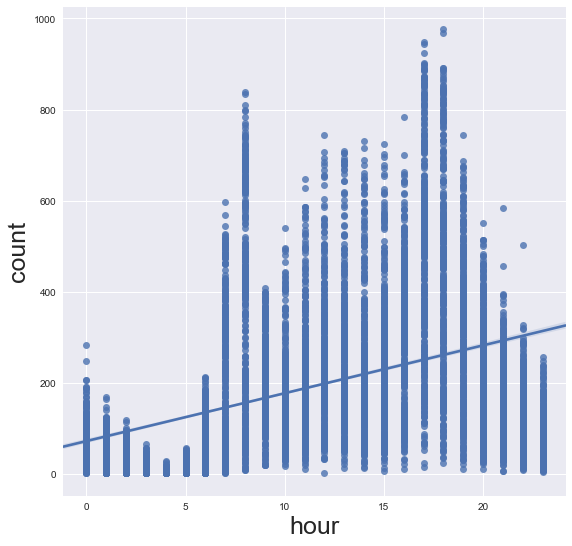

In [31]:
rc={'axes.labelsize':25,'font.size':25,'legend.fontsize':25.0,'axes.titlesize':25}
sns.set(rc=rc,color_codes=True)
a4_dims=(9,9)
fig,ax = pyplot.subplots(figsize=a4_dims)
sns.regplot(x='hour',y='count',data=data)

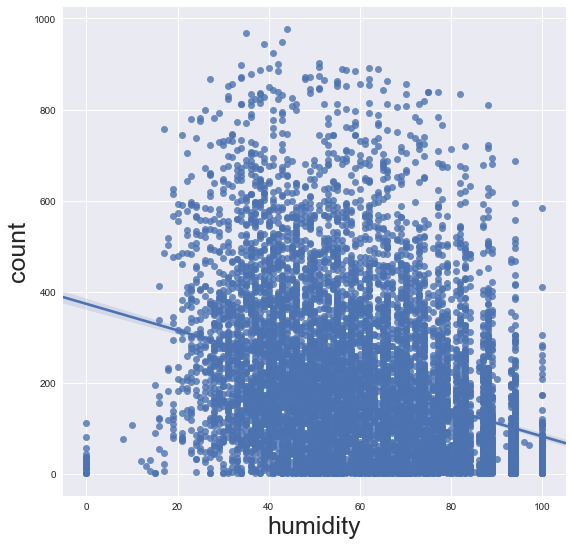

In [32]:
rc={'axes.labelsize':25,'font.size':25,'legend.fontsize':25.0,'axes.titlesize':25}
sns.set(rc=rc)
a4_dims=(9,9)
fig,ax = pyplot.subplots(figsize=a4_dims)
sns.regplot(x='humidity',y='count',data=data,ax=ax)

In [33]:
data.head()

,year,month,dayOfWeek,hour,season,holiday,workingday,weather,temp,humidity,windspeed,count
5,2011,1,5,5,1,0,0,2,9.84,75,6.0032,1
10,2011,1,5,10,1,0,0,1,15.58,76,16.9979,36
11,2011,1,5,11,1,0,0,1,14.76,81,19.0012,56
12,2011,1,5,12,1,0,0,1,17.22,77,19.0012,84
13,2011,1,5,13,1,0,0,2,18.86,72,19.9995,94


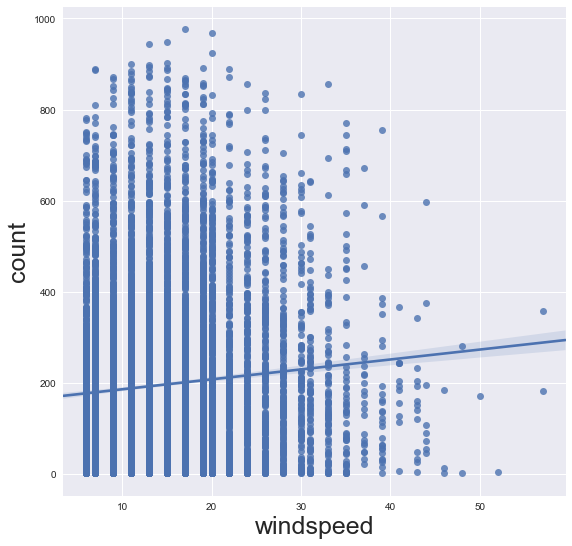

In [34]:
rc={'axes.labelsize':25,'font.size':25,'legend.fontsize':25.0,'axes.titlesize':25}
sns.set(rc=rc)
a4_dims=(9,9)
fig,ax = pyplot.subplots(figsize=a4_dims)
sns.regplot(x='windspeed',y='count',data=data,ax=ax)

# Correlation Matrix

In [35]:
data.corr()

,year,month,dayOfWeek,hour,season,holiday,workingday,weather,temp,humidity,windspeed,count
year,1.000000,0.004607,-0.010836,-0.000627,0.005738,0.018217,-0.001228,-0.026819,0.046521,-0.077074,-0.035825,0.263570
month,0.004607,1.000000,-0.002518,-0.001188,0.971289,-0.002208,0.003590,0.028839,0.273341,0.196324,-0.142505,0.180314
dayOfWeek,-0.010836,-0.002518,1.000000,-0.007514,-0.008872,-0.189501,-0.707394,-0.048993,-0.042101,-0.022123,-0.030849,-0.007415
hour,-0.000627,-0.001188,-0.007514,1.000000,0.000434,0.011042,0.004156,-0.032719,0.148896,-0.264807,0.126289,0.395775
season,0.005738,0.971289,-0.008872,0.000434,1.000000,0.023420,-0.003966,0.024540,0.270767,0.182203,-0.138272,0.176747
holiday,0.018217,-0.002208,-0.189501,0.011042,0.023420,1.000000,-0.248363,0.003193,-0.011869,-0.000164,0.015603,-0.005544
workingday,-0.001228,0.003590,-0.707394,0.004156,-0.003966,-0.248363,1.000000,0.028688,0.032487,-0.015519,0.021188,0.017540
weather,-0.026819,0.028839,-0.048993,-0.032719,0.024540,0.003193,0.028688,1.000000,-0.055765,0.426044,-0.011837,-0.140967
temp,0.046521,0.273341,-0.042101,0.148896,0.270767,-0.011869,0.032487,-0.055765,1.000000,-0.041539,-0.038902,0.399011
humidity,-0.077074,0.196324,-0.022123,-0.264807,0.182203,-0.000164,-0.015519,0.426044,-0.041539,1.000000,-0.328272,-0.305600


Training and testing using Linear_model

In [36]:
from sklearn import linear_model
#extracting the y , pointing that our target attribute is "count"
y=data['count']
#Splitting the training , and testing set using "train_test_split() method
#Note : 
# X_train is the data used for training, y_train is the labels (target values of the X_train)
# X_test is the data used for testing, y_test is the labels (target values of the X_test)
X_train, X_test, y_train, y_test = train_test_split(data,y, test_size=0.1)
#Notice (after printing) that the number of rows in X_train + the number of rows in X_test = The number of rows 
# in all the data (Obvious)
#printing to make sure that everything is working fine
print("Xtrain shape is",X_train.shape)
print("X_test shape is",X_test.shape)
print("y_train shape is",y_train.shape)
print("y_test shape is",y_test.shape)

#instantiating the Linear Model and start fitting (training) on X_train and Y_train
reg=linear_model.LinearRegression(normalize=True)
reg.fit(X_train,y_train)
#predictionf X_test values and putting the expected target values in LinearRegression_pred
LinearRegression_pred=reg.predict(X_test)
#Calculating the mean squared error score
print ("mean squared error score is ",mean_squared_error(y_test,LinearRegression_pred))
print ("r2_score score is ",r2_score(y_test,LinearRegression_pred))

Xtrain shape is (8615, 12)
X_test shape is (958, 12)
y_train shape is (8615,)
y_test shape is (958,)
mean squared error score is  3.96369916141e-26
r2_score score is  1.0


## References : 

https://github.com/siyuanligit/Bike-Sharing-Demand-Kaggle/blob/master/Bike%20Share%20Rental%20Analysis%20Report%20Siyuan%20Li.md
